# Text Classification with Naive Bayes
From [Wikipedia](https://en.wikipedia.org/wiki/Natural_language_processing#Rule-based_vs._statistical_NLP):
>In the early days, many language-processing systems were designed by hand-coding a set of rules, e.g. by writing grammars or devising heuristic rules for stemming. However, this is rarely robust to natural language variation.
<br><br>
>The machine-learning paradigm calls instead for using statistical inference to automatically learn such rules through the analysis of large corpora of typical real-world examples (**a corpus** (plural, "corpora") **is a set of documents, possibly with human or computer annotations**).
<br><br>
>Many different classes of machine-learning algorithms have been applied to natural-language-processing tasks. These algorithms take as input a large set of "features" that are generated from the input data. Some of the earliest-used algorithms, such as decision trees, produced systems of hard if-then rules similar to the systems of hand-written rules that were then common. Increasingly, however, research has focused on statistical models, which make soft, probabilistic decisions based on attaching real-valued weights to each input feature. Such models have the advantage that they can express the relative certainty of many different possible answers rather than only one, producing more reliable results when such a model is included as a component of a larger system.
<br><br>
>Systems based on machine-learning algorithms have many advantages over hand-produced rules:
<br><br>
>* The learning procedures used during machine learning automatically focus on the most common cases, whereas when writing rules by hand it is often not at all obvious where the effort should be directed.
<br><br>
>* Automatic learning procedures can make use of statistical-inference algorithms to produce models that are robust to unfamiliar input (e.g. containing words or structures that have not been seen before) and to erroneous input (e.g. with misspelled words or words accidentally omitted). Generally, handling such input gracefully with hand-written rules—or, more generally, creating systems of hand-written rules that make soft decisions—is extremely difficult, error-prone and time-consuming.
<br><br>
>* Systems based on automatically learning the rules can be made more accurate simply by supplying more input data. However, systems based on hand-written rules can only be made more accurate by increasing the complexity of the rules, which is a much more difficult task. In particular, there is a limit to the complexity of systems based on hand-crafted rules, beyond which the systems become more and more unmanageable. However, creating more data to input to machine-learning systems simply requires a corresponding increase in the number of man-hours worked, generally without significant increases in the complexity of the annotation process.

<br><br>
Also from [Wikipedia](https://en.wikipedia.org/wiki/Rotten_Tomatoes):
>**Rotten Tomatoes** is an American review-aggregation website for film and television.
<br><br>
>The website keeps track of all of the reviews counted for each film and the percentage of positive reviews is calculated. Major, recently released films can attract up to 300 reviews. If the positive reviews make up 60% or more, the film is considered "fresh", in that a supermajority of the reviewers approve of the film. If the positive reviews are less than 60%, the film is considered "rotten". With each review, a short excerpt of the review is quoted that also serves a hyperlink to the complete review essay for anyone interested to read the critic's full thoughts on the subject.

<br><br>
And this from [this article](https://www.huffingtonpost.com/entry/how-can-i-become-a-top-critic-on-rotten-tomatoes_us_59ee3a6fe4b036b5fdb9e5e9):
>To become a Top Critic, you first have to be a professional film critic at an outlet invited to join RT. Then, you have to establish a history of several years working at prominent outlets with significant readership/viewership, and be considered by the public, peers, and (especially) RT to be influential and providing high quality film reviews. In other words, be a well known critic who writes impressive reviews at a well-known outlet for a long period of time.
<br>

---
The dataset explored below includes reviews from all 'Top Critics' for each movie in the Rotten Tomatoes DVD & Streaming movies database.

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

%matplotlib inline

In [2]:
# read in and save the dataset created by the rt_released_movies.py file:
df = pd.read_csv('data/rt_reviews_released_movies.csv')
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144595 entries, 0 to 144594
Data columns (total 10 columns):
movie            144595 non-null object
total_reviews    144595 non-null int64
num_fresh        144595 non-null int64
num_rotten       144595 non-null int64
tomatometer      144595 non-null float64
top_critic       144595 non-null object
source           144595 non-null object
review_quote     144595 non-null object
freshness        144595 non-null object
review_date      144595 non-null object
dtypes: float64(1), int64(3), object(6)
memory usage: 11.0+ MB
None


,movie,total_reviews,num_fresh,num_rotten,tomatometer,top_critic,source,review_quote,freshness,review_date
0,Equalizer 2,180,91,89,0.505556,Oliver Jones,Observer,Washington is a pleasure to watch on the scre...,fresh,"August 28, 2018"
1,Equalizer 2,180,91,89,0.505556,Michael Gingold,Time Out,"Once it's over, you won't necessarily be itch...",rotten,"August 10, 2018"
2,Equalizer 2,180,91,89,0.505556,Matthew Lickona,San Diego Reader,It's not much of a movie - more a parade of r...,rotten,"July 27, 2018"
3,Equalizer 2,180,91,89,0.505556,Michael O'Sullivan,Washington Post,"McCall, for all his high-minded talk, seems t...",rotten,"July 24, 2018"
4,Equalizer 2,180,91,89,0.505556,Katie Walsh,Tribune News Service,"Even with Washington at the top of his game, ...",rotten,"July 20, 2018"


In [3]:
df['fresh'] = (df.freshness == 'fresh').astype(int)
df.tail()

,movie,total_reviews,num_fresh,num_rotten,tomatometer,top_critic,source,review_quote,freshness,review_date,fresh
144590,The Intended,27,9,18,0.333333,Stephen Holden,New York Times,"Not even Janet McTeer, one of the world's mos...",rotten,"June 24, 2004",0
144591,The Intended,27,9,18,0.333333,Jan Stuart,Newsday,Lays out many of the elements of a classic go...,rotten,"June 24, 2004",0
144592,The Intended,27,9,18,0.333333,Scott Foundas,L.A. Weekly,"Choking on its gothic, mosquito-infested atmo...",rotten,"June 23, 2004",0
144593,The Intended,27,9,18,0.333333,Joshua Land,Village Voice,A taut noirish thriller that unfolds in a fev...,fresh,"June 22, 2004",1
144594,The Intended,27,9,18,0.333333,Sheri Linden,Hollywood Reporter,Contributions of the accomplished cast notwit...,rotten,"June 21, 2004",0


In [4]:
n_reviews = len(df)
n_movies = df.movie.unique().size
n_critics = df.top_critic.unique().size
n_pubs = df.source.unique().size

print("Number of reviews: {:d}".format(n_reviews))
print("Number of movies:  {:d}".format(n_movies))
print("Number of 'Top Critics': {:d}".format(n_critics))
print("Number of publications:  {:d}".format(n_pubs))
print()
print('Average movie tomatometer: {:0.0f}%'.format(df.groupby('movie')['tomatometer'].mean().mean()*100))
print("Average 'Top Critic' review freshness: {:0.0f}%".format(df.fresh.mean()*100))

Number of reviews: 144595
Number of movies:  9276
Number of 'Top Critics': 2744
Number of publications:  655

Average movie tomatometer: 60%
Average 'Top Critic' review freshness: 59%


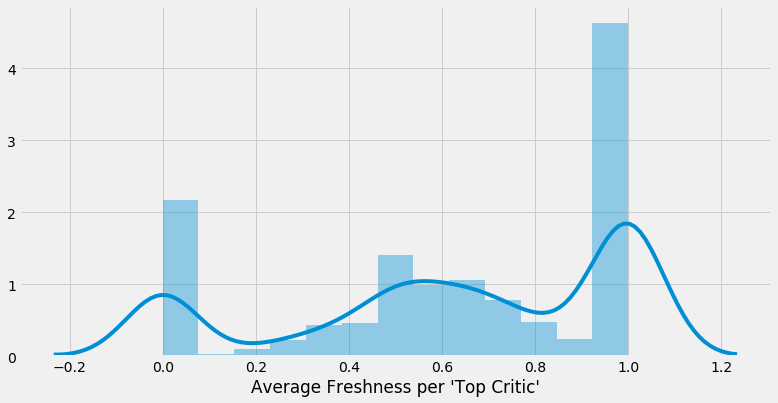

In [5]:
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize=(12, 6))
sns.distplot(df.groupby('top_critic')['fresh'].mean())
plt.xlabel("Average Freshness per 'Top Critic'");

In [6]:
critics_df = pd.DataFrame({
    'num_reviews': df.groupby('top_critic')['freshness'].count(),
    'avg_freshness': df.groupby('top_critic')['fresh'].mean()
}).reset_index()
critics_df.head()

,top_critic,num_reviews,avg_freshness
0,Emerson Rosenthal,1,1.000000
1,Nicholas Bell,1,1.000000
2,A.A. Dowd,484,0.611570
3,A.D. Murphy,4,1.000000
4,A.H. Weiler,9,0.444444


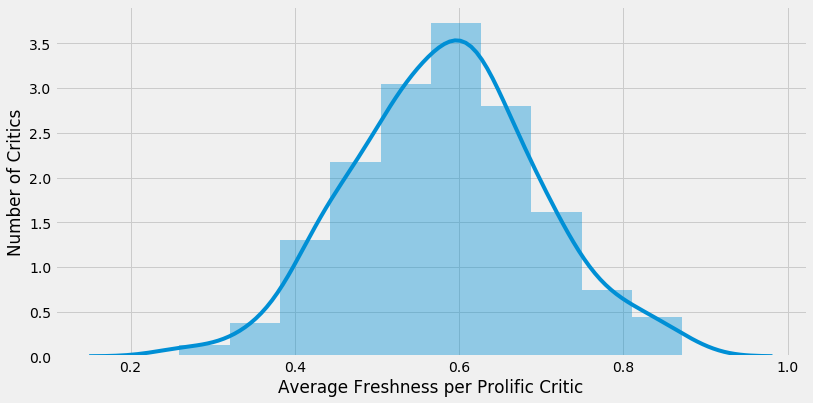

In [7]:
fig, ax = plt.subplots(figsize=(12, 6))

# Create histogram of mean freshness for prolific critics (>99 reviews):
sns.distplot(critics_df[critics_df.num_reviews >= 100].avg_freshness, bins=10)
plt.xlabel('Average Freshness per Prolific Critic')
plt.ylabel('Number of Critics');

---
## BAG OF WORDS
From [scikit-learn](https://scikit-learn.org/stable/modules/feature_extraction.html#the-bag-of-words-representation):
>Text Analysis is a major application field for machine learning algorithms. However the raw data, a sequence of symbols cannot be fed directly to the algorithms themselves as most of them expect numerical feature vectors with a fixed size rather than the raw text documents with variable length.
<br><br>
>In order to address this, scikit-learn provides utilities for the most common ways to extract numerical features from text content, namely:
>* **tokenizing** strings and giving an integer id for each possible token, for instance by using white-spaces and punctuation as token separators.
<br>
>* **counting** the occurrences of tokens in each document.
<br>
>* **normalizing** and weighting with diminishing importance tokens that occur in the majority of samples / documents.


>In this scheme, features and samples are defined as follows:
>* each individual token occurrence frequency (normalized or not) is treated as a feature.
<br>
>* the vector of all the token frequencies for a given document is considered a multivariate sample.
<br>

>A **corpus** of documents can thus be represented by a matrix with one row per document and one column per token (e.g. word) occurring in the corpus.
<br><br>
>We call **vectorization** the general process of turning a collection of text documents into numerical feature vectors. This specific strategy (tokenization, counting and normalization) is called the Bag of Words or “Bag of n-grams” representation. Documents are described by word occurrences while completely ignoring the relative position information of the words in the document.

### Tokenizing & Counting
From [scikit-learn](https://scikit-learn.org/stable/modules/feature_extraction.html#common-vectorizer-usage)
>`CountVectorizer` implements both tokenization and occurrence counting in a single class:

In [8]:
# Simple example to get familiar -

corpus = [
    "Roger Murdock: We have clearance, Clarence.", 
    "Captain Oveur: Roger, Roger. What's our vector, Victor?",
    "Tower voice: Tower's radio clearance, over!",
    "Captain Oveur: That's Clarence Oveur. Over."
]

# Initialize the sklearn vectorizer:
vectorizer = CountVectorizer()

# Learn the vocabulary and return 'bag of words' term-document matrix:
X = vectorizer.fit_transform(corpus)
X

<4x17 sparse matrix of type '<class 'numpy.int64'>'
	with 23 stored elements in Compressed Sparse Row format>

>The default configuration tokenizes the string by extracting words of at least 2 letters. Each term found by the analyzer during the fit is assigned a unique integer index corresponding to a column in the resulting matrix. This interpretation of the columns can be retrieved as follows:

In [9]:
print(vectorizer.get_feature_names())

['captain', 'clarence', 'clearance', 'have', 'murdock', 'our', 'over', 'oveur', 'radio', 'roger', 'that', 'tower', 'vector', 'victor', 'voice', 'we', 'what']


In [10]:
# Print a mapping of terms to feature indices:
vectorizer.vocabulary_

{'captain': 0,
 'clarence': 1,
 'clearance': 2,
 'have': 3,
 'murdock': 4,
 'our': 5,
 'over': 6,
 'oveur': 7,
 'radio': 8,
 'roger': 9,
 'that': 10,
 'tower': 11,
 'vector': 12,
 'victor': 13,
 'voice': 14,
 'we': 15,
 'what': 16}

From [scikit-learn](https://scikit-learn.org/stable/modules/feature_extraction.html#sparsity):
>As most documents will typically use a very small subset of the words used in the corpus, the resulting matrix will have many feature values that are zeros (typically more than 99% of them).
<br><br>
>For instance a collection of 10,000 short text documents (such as emails) will use a vocabulary with a size in the order of 100,000 unique words in total while each document will use 100 to 1000 unique words individually.
<br><br>
>In order to be able to store such a matrix in memory but also to speed up algebraic operations matrix / vector, implementations will typically use a **sparse representation** such as the implementations available in the scipy.sparse package.

In [11]:
# Print the sparse term-document matrix:
print(X)

  (0, 1)	1
  (0, 2)	1
  (0, 3)	1
  (0, 15)	1
  (0, 4)	1
  (0, 9)	1
  (1, 13)	1
  (1, 12)	1
  (1, 5)	1
  (1, 16)	1
  (1, 7)	1
  (1, 0)	1
  (1, 9)	2
  (2, 6)	1
  (2, 8)	1
  (2, 14)	1
  (2, 11)	2
  (2, 2)	1
  (3, 10)	1
  (3, 6)	1
  (3, 7)	2
  (3, 0)	1
  (3, 1)	1


In [12]:
# Convert the sparse matrix to a dense (includes zeros) matrix:
X.toarray()

array([[0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0],
       [1, 0, 0, 0, 0, 1, 0, 1, 0, 2, 0, 0, 1, 1, 0, 0, 1],
       [0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 2, 0, 0, 1, 0, 0],
       [1, 1, 0, 0, 0, 0, 1, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0]], dtype=int64)

### Normalizing
From [scikit-learn](https://scikit-learn.org/stable/modules/feature_extraction.html#tfidf-term-weighting):
>In a large text corpus, some words will be very present (e.g. “the”, “a”, “is” in English) hence carrying very little meaningful information about the actual contents of the document. If we were to feed the direct count data directly to a classifier those very frequent terms would shadow the frequencies of rarer yet more interesting terms.
<br><br>
>In order to re-weight the count features into floating point values suitable for usage by a classifier it is very common to use the tf–idf transform.
<br><br>
>Tf means **term-frequency** while tf–idf means term-frequency times **inverse document-frequency**: $\text{tf-idf(t, d)}=\text{tf(t, d)} \times \text{idf(t)}$
<br><br>
>Using the `TfidfTransformer`’s default settings, `TfidfTransformer(norm='l2', use_idf=True, smooth_idf=True, sublinear_tf=False)` the term frequency, the number of times a term occurs in a given document, is multiplied with idf component, which is computed as:
$$ \text{idf}(t) = log{\frac{1 + n_d}{1+\text{df}(d,t)}} + 1 $$
<br><br>
>where $n_d$ is the total number of documents, and $\text{df}(d,t)$ is the number of documents that contain term $t$. The resulting tf-idf vectors are then normalized by the Euclidean norm:
$$ v_{norm} = \frac{v}{||v||_2} = \frac{v}{\sqrt{v{_1}^2 +
v{_2}^2 + \dots + v{_n}^2}} $$
<br><br>
>This was originally a term weighting scheme developed for information retrieval (as a ranking function for search engines results) that has also found good use in document classification and clustering.

In [13]:
# Initialize the sklearn transformer:
transformer = TfidfTransformer(smooth_idf=False)

tfidf = transformer.fit_transform(X)
tfidf.toarray()

array([[0.        , 0.33409354, 0.33409354, 0.47086605, 0.47086605,
        0.        , 0.        , 0.        , 0.        , 0.33409354,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.47086605, 0.        ],
       [0.26778343, 0.        , 0.        , 0.        , 0.        ,
        0.37740966, 0.        , 0.26778343, 0.        , 0.53556687,
        0.        , 0.        , 0.37740966, 0.37740966, 0.        ,
        0.        , 0.37740966],
       [0.        , 0.        , 0.26804568, 0.        , 0.        ,
        0.        , 0.26804568, 0.        , 0.37777926, 0.        ,
        0.        , 0.75555853, 0.        , 0.        , 0.37777926,
        0.        , 0.        ],
       [0.33358616, 0.33358616, 0.        , 0.        , 0.        ,
        0.        , 0.33358616, 0.66717232, 0.        , 0.        ,
        0.47015096, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ]])

>**smooth_idf : boolean, default=True** Smooth idf weights by adding one to document frequencies, as if an extra document was seen containing every term in the collection exactly once. Prevents zero divisions.

In [14]:
# Initialize the sklearn transformer:
transformer = TfidfTransformer()

tfidf = transformer.fit_transform(X)
tfidf.toarray()

array([[0.        , 0.35745504, 0.35745504, 0.4533864 , 0.4533864 ,
        0.        , 0.        , 0.        , 0.        , 0.35745504,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.4533864 , 0.        ],
       [0.28358005, 0.        , 0.        , 0.        , 0.        ,
        0.35968533, 0.        , 0.28358005, 0.        , 0.56716009,
        0.        , 0.        , 0.35968533, 0.35968533, 0.        ,
        0.        , 0.35968533],
       [0.        , 0.        , 0.29294639, 0.        , 0.        ,
        0.        , 0.29294639, 0.        , 0.37156534, 0.        ,
        0.        , 0.74313069, 0.        , 0.        , 0.37156534,
        0.        , 0.        ],
       [0.34082342, 0.34082342, 0.        , 0.        , 0.        ,
        0.        , 0.34082342, 0.68164684, 0.        , 0.        ,
        0.43229129, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ]])

>The weights of each feature computed by the `fit` method call are stored in a model attribute:

In [15]:
transformer.idf_

array([1.51082562, 1.51082562, 1.51082562, 1.91629073, 1.91629073,
       1.91629073, 1.51082562, 1.51082562, 1.91629073, 1.51082562,
       1.91629073, 1.91629073, 1.91629073, 1.91629073, 1.91629073,
       1.91629073, 1.91629073])

### Tokenize, Count, Normalize with One Vectorizer
>As tf–idf is very often used for text features, there is also another class called `TfidfVectorizer` that combines all the options of `CountVectorizer` and `TfidfTransformer` in a single model:

In [16]:
# Initialize the sklearn vectorizer:
vectorizer = TfidfVectorizer()

# Learn the vocabulary and idf, return 'bag of words' term-document matrix:
tfidf = vectorizer.fit_transform(corpus)

pd.DataFrame(tfidf.toarray(), columns=vectorizer.get_feature_names())

,captain,clarence,clearance,have,murdock,our,over,oveur,radio,roger,that,tower,vector,victor,voice,we,what
0,0.000000,0.357455,0.357455,0.453386,0.453386,0.000000,0.000000,0.000000,0.000000,0.357455,0.000000,0.000000,0.000000,0.000000,0.000000,0.453386,0.000000
1,0.283580,0.000000,0.000000,0.000000,0.000000,0.359685,0.000000,0.283580,0.000000,0.567160,0.000000,0.000000,0.359685,0.359685,0.000000,0.000000,0.359685
2,0.000000,0.000000,0.292946,0.000000,0.000000,0.000000,0.292946,0.000000,0.371565,0.000000,0.000000,0.743131,0.000000,0.000000,0.371565,0.000000,0.000000
3,0.340823,0.340823,0.000000,0.000000,0.000000,0.000000,0.340823,0.681647,0.000000,0.000000,0.432291,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [17]:
print(vectorizer.idf_.tolist())

[1.5108256237659907, 1.5108256237659907, 1.5108256237659907, 1.916290731874155, 1.916290731874155, 1.916290731874155, 1.5108256237659907, 1.5108256237659907, 1.916290731874155, 1.5108256237659907, 1.916290731874155, 1.916290731874155, 1.916290731874155, 1.916290731874155, 1.916290731874155, 1.916290731874155, 1.916290731874155]


>While the tf–idf normalization is often very useful, there might be cases where the binary occurrence markers might offer better features. This can be achieved by using the binary parameter of `CountVectorizer`. In particular, some estimators such as Bernoulli Naive Bayes explicitly model discrete boolean random variables. Also, **very short texts are likely to have noisy tf–idf values** while the binary occurrence info is more stable.
<br><br>
>As usual the best way to adjust the feature extraction parameters is to use a cross-validated grid search, for instance by pipelining the feature extractor with a classifier.

### Bag of N-Grams
From [scikit-learn](https://scikit-learn.org/stable/modules/feature_extraction.html#limitations-of-the-bag-of-words-representation):
>A collection of unigrams (what bag of words is) cannot capture phrases and multi-word expressions, effectively disregarding any word order dependence. Additionally, the bag of words model doesn’t account for potential misspellings or word derivations.
<br><br>
>N-grams to the rescue! Instead of building a simple collection of unigrams (n=1), one might prefer a collection of bigrams (n=2), where occurrences of pairs of consecutive words are counted.
<br><br>
>One might alternatively consider a collection of character n-grams, a representation resilient against misspellings and derivations.


>**analyzer : string, {‘word’, ‘char’, ‘char_wb’} or callable**
Whether the feature should be made of word or character n-grams. Option ‘char_wb’ creates character n-grams only from text inside word boundaries; n-grams at the edges of words are padded with space.


>**ngram_range : tuple (min_n, max_n)**
The lower and upper boundary of the range of n-values for different n-grams to be extracted. All values of n such that min_n <= n <= max_n will be used.

In [18]:
# Initialize the sklearn vectorizer:
vectorizer = TfidfVectorizer(ngram_range=(2, 2))

# Learn the vocabulary and idf, return 'bag of words' term-document matrix:
tfidf = vectorizer.fit_transform(corpus)

pd.DataFrame(tfidf.toarray(), columns=vectorizer.get_feature_names())

,captain oveur,clarence oveur,clearance clarence,clearance over,have clearance,murdock we,our vector,oveur over,oveur roger,oveur that,...,roger murdock,roger roger,roger what,that clarence,tower radio,tower voice,vector victor,voice tower,we have,what our
0,0.000000,0.000000,0.447214,0.000000,0.447214,0.447214,0.000000,0.000000,0.000000,0.000000,...,0.447214,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.447214,0.000000
1,0.306388,0.000000,0.000000,0.000000,0.000000,0.000000,0.388614,0.000000,0.388614,0.000000,...,0.000000,0.388614,0.388614,0.000000,0.000000,0.000000,0.388614,0.000000,0.000000,0.388614
2,0.000000,0.000000,0.000000,0.447214,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.447214,0.447214,0.000000,0.447214,0.000000,0.000000
3,0.366739,0.465162,0.000000,0.000000,0.000000,0.000000,0.000000,0.465162,0.000000,0.465162,...,0.000000,0.000000,0.000000,0.465162,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


---
## NAIVE BAYES
From [Wikipedia](https://en.wikipedia.org/wiki/Naive_Bayes_classifier):
>Naive Bayes has been studied extensively since the 1950s. It was introduced under a different name into the text retrieval community in the early 1960s, and remains a popular (baseline) method for text categorization, the problem of judging documents as belonging to one category or the other (such as spam or legitimate, sports or politics, etc.) with word frequencies as the features. With appropriate pre-processing, it is competitive in this domain with more advanced methods including support vector machines.


From [scikit-learn](https://scikit-learn.org/stable/modules/naive_bayes.html#):
>Naive Bayes methods are a set of supervised learning algorithms based on applying Bayes’ theorem with the “naive” assumption of conditional independence between every pair of features given the value of the class variable. Bayes’ theorem states the following relationship, given class variable  and dependent feature vector $x_1$ through $x_n$:
$$ P(y \mid x_1, \dots, x_n) = \frac{P(y) P(x_1, \dots x_n \mid y)}
                                 {P(x_1, \dots, x_n)} $$
<br>
>The different naive Bayes classifiers differ mainly by the assumptions they make regarding the distribution of $P(x_i \mid y)$.
<br><br>
>In spite of their apparently over-simplified assumptions, naive Bayes classifiers have worked quite well in many real-world situations, famously document classification and spam filtering. They require a small amount of training data to estimate the necessary parameters.
<br><br>
>Naive Bayes learners and classifiers can be extremely fast compared to more sophisticated methods. The decoupling of the class conditional feature distributions means that each distribution can be independently estimated as a one dimensional distribution. This in turn helps to alleviate problems stemming from the curse of dimensionality.
<br><br>
>On the flip side, although naive Bayes is known as a decent classifier, it is known to be a bad estimator, so the probability outputs from `predict_proba` are not to be taken too seriously.


>### Multinomial Naive Bayes
>`MultinomialNB` implements the naive Bayes algorithm for multinomially distributed data, and is one of the two classic naive Bayes variants used in text classification (where the data are typically represented as word vector counts, although tf-idf vectors are also known to work well in practice). The distribution is parametrized by vectors $\theta_y = (\theta_{y1},\ldots,\theta_{yn})$ for each class $y$, where $n$ is the number of features (in text classification, the size of the vocabulary) and $\theta_{yi}$ is the probability $P(x_i \mid y)$ of feature $i$ appearing in a sample belonging to class $y$.
<br><br>
>The parameters $\theta_y$ is estimated by a smoothed version of maximum likelihood, i.e. relative frequency counting:
$$ \hat{\theta}_{yi} = \frac{ N_{yi} + \alpha}{N_y + \alpha n} $$
<br><br>
>where $N_{yi} = \sum_{x \in T} x_i$ is the number of times feature $i$ appears in a sample of class $y$ in the training set $T$, and $N_{y} = \sum_{i=1}^{n} N_{yi}$ is the total count of all features for class $y$.
<br><br>
>The smoothing priors $\alpha \ge 0$ accounts for features not present in the learning samples and prevents zero probabilities in further computations. Setting $\alpha = 1$ is called Laplace smoothing, while $\alpha < 1$ is called Lidstone smoothing.

---
## ROTTEN TOMATOES REVIEWS
To simulate the real world, where new documents may contain words never seen before, it may make sense to split the data into training and test sets before vectorization of the corpus. 

In [19]:
X = df.review_quote
y = df.fresh

#### Vectorize First

In [20]:
def vectorize_split_classify(X, y, tfidf=False):
    if tfidf:
        vectorizer = TfidfVectorizer()
        print('TFIDF VECTORIZER')
    else:
        vectorizer = CountVectorizer()
        print('COUNT VECTORIZER')
        
    X = vectorizer.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=32)

    clf = MultinomialNB().fit(X_train, y_train)

    print("\tAccuracy on Training Data: {:0.2f}%".format(clf.score(X_train, y_train)*100))
    print("\t    Accuracy on Test Data: {:0.2f}%".format(clf.score(X_test, y_test)*100))

In [21]:
vectorize_split_classify(X, y, tfidf=False)
print()
vectorize_split_classify(X, y, tfidf=True)

COUNT VECTORIZER
	Accuracy on Training Data: 84.20%
	    Accuracy on Test Data: 77.95%

TFIDF VECTORIZER
	Accuracy on Training Data: 80.82%
	    Accuracy on Test Data: 75.23%


#### Train/Test Split First

In [22]:
def split_vectorize_classify(X, y, tfidf=False):
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=32)
    
    if tfidf:
        vectorizer = TfidfVectorizer()
        X_train = vectorizer.fit_transform(X_train)
        X_test = vectorizer.transform(X_test)
        print('TFIDF VECTORIZER')
    else:
        vectorizer = CountVectorizer()
        X_train = vectorizer.fit_transform(X_train)
        X_test = vectorizer.transform(X_test)
        print('COUNT VECTORIZER')
        
    clf = MultinomialNB().fit(X_train, y_train)

    print("\tAccuracy on Training Data: {:0.2f}%".format(clf.score(X_train, y_train)*100))
    print("\t    Accuracy on Test Data: {:0.2f}%".format(clf.score(X_test, y_test)*100))

In [23]:
split_vectorize_classify(X, y, tfidf=False)
print()
split_vectorize_classify(X, y, tfidf=True)

COUNT VECTORIZER
	Accuracy on Training Data: 84.19%
	    Accuracy on Test Data: 77.95%

TFIDF VECTORIZER
	Accuracy on Training Data: 81.16%
	    Accuracy on Test Data: 75.36%


### Hyper-Parameter Tuning
From [this stackoverflow question](https://stackoverflow.com/questions/27697766/understanding-min-df-and-max-df-in-scikit-countvectorizer):
>`max_df` is used for removing terms that appear too frequently, also known as "corpus-specific stop words". For example:
<br>
>* `max_df = 0.50` means "ignore terms that appear in more than 50% of the documents".
>* `max_df = 25` means "ignore terms that appear in more than 25 documents".
<br><br>
>The default `max_df` is 1.0, which means "ignore terms that appear in more than 100% of the documents". Thus, the default setting does not ignore any terms.
<br>
>---
>`min_df` is used for removing terms that appear too infrequently. For example:
<br>
>* `min_df = 0.01` means "ignore terms that appear in less than 1% of the documents".
>* `min_df = 5` means "ignore terms that appear in less than 5 documents".
<br><br>
>The default `min_df` is 1, which means "ignore terms that appear in less than 1 document". Thus, the default setting does not ignore any terms.

In [24]:
def split_vectorize_classify(X, y, parameters, tfidf=False, ngram_range=(1, 1)):
    
    if tfidf:
        pipeline = Pipeline([
            ('vect', TfidfVectorizer(ngram_range=ngram_range)),
            ('clf', MultinomialNB()),
        ])
        print('TFIDF VECTORIZER')
    else:
        pipeline = Pipeline([
            ('vect', CountVectorizer(ngram_range=ngram_range)),
            ('clf', MultinomialNB()),
        ])
        print('COUNT VECTORIZER')
        
    # Split:
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=32)
    
    # Vectorize and fit:
    grid_search = GridSearchCV(pipeline, parameters, cv=5, n_jobs=-1)    
    grid_search.fit(X_train, y_train)
    
    best_parameters = grid_search.best_estimator_.get_params()
    best_score = grid_search.best_score_

    print('Best Score: {:0.2f}%'.format(best_score*100))
    for param_name in sorted(parameters.keys()):
        print('\n{}\n\tsearched={}\n\tbest={}'.format(param_name, parameters[param_name], best_parameters[param_name]))
        
    # Save MultinomialNB classifier:
    clf = grid_search.best_estimator_.named_steps['clf']

    # Save the vectorizer:
    vectorizer = grid_search.best_estimator_.named_steps['vect']

    clf.fit(vectorizer.fit_transform(X_train), y_train)
    
    print()
    # grid_search.score(xtrain, ytrain) would also work here:
    print("Accuracy on Training Data: {:0.2f}%".format(clf.score(vectorizer.fit_transform(X_train), y_train)*100))

    # grid_search.score(xtest, ytest) would also work here:
    print("    Accuracy on Test Data: {:0.2f}%".format(clf.score(vectorizer.transform(X_test), y_test)*100))
    
    # Classify:
    confusion = confusion_matrix(y_test, grid_search.predict(X_test))
    
    return clf, vectorizer, confusion

In [25]:
import hide_output

parameters = {
    'vect__min_df': (1e-5, 1e-4, 1e-3, 1e-2, 1e-1),
    'vect__max_df': (0.25, 0.5, 0.75, 1.0),
    'clf__alpha': (0.1, 1, 5, 10),
    'clf__fit_prior': (True, False)
}

print()
clf_count, vectorizer_count, confusion_count = split_vectorize_classify(X, y, parameters)
print('_'*65)
print()
clf_tfidf, vectorizer_tfidf, confusion_tfidf = split_vectorize_classify(X, y, parameters, tfidf=True)
print()


COUNT VECTORIZER
Best Score: 77.96%

clf__alpha
	searched=(0.1, 1, 5, 10)
	best=1

clf__fit_prior
	searched=(True, False)
	best=True

vect__max_df
	searched=(0.25, 0.5, 0.75, 1.0)
	best=0.75

vect__min_df
	searched=(1e-05, 0.0001, 0.001, 0.01, 0.1)
	best=1e-05

Accuracy on Training Data: 83.27%
    Accuracy on Test Data: 77.90%
_________________________________________________________________

TFIDF VECTORIZER
Best Score: 77.79%

clf__alpha
	searched=(0.1, 1, 5, 10)
	best=1

clf__fit_prior
	searched=(True, False)
	best=False

vect__max_df
	searched=(0.25, 0.5, 0.75, 1.0)
	best=0.75

vect__min_df
	searched=(1e-05, 0.0001, 0.001, 0.01, 0.1)
	best=1e-05

Accuracy on Training Data: 83.24%
    Accuracy on Test Data: 77.56%



### Hyper-Parameter Tuning with a Custom Metric
From [Wikipedia](https://en.wikipedia.org/wiki/Likelihood_function):
>In frequentist inference, a likelihood function (often simply the likelihood) is a function of the parameters of a statistical model, given specific observed data. Likelihood functions play a key role in frequentist inference, especially methods of estimating a parameter from a set of statistics. In informal contexts, "likelihood" is often used as a synonym for "probability". In mathematical statistics, the two terms have different meanings: Probability in this context describes the plausibility of (random) observed data assumed to be described by a statistical model a parameter value of which is given, without reference to any observed data; whereas likelihood in this context describes the plausibility of a parameter value of the statistical model assumed to describe the observed data, given specific observed data.

>For many applications, the natural logarithm of the likelihood function, called the **log-likelihood**, is more convenient to work with. This is because we are generally interested in where the likelihood reaches its maximum value: the logarithm is a strictly increasing function, so the logarithm of a function achieves its maximum value at the same points as the function itself, and hence the log-likelihood can be used in place of the likelihood in maximum likelihood estimation and related techniques.

In [26]:
def log_likelihood(clf, X, y):
    log_proba = clf.predict_log_proba(X)
    rotten = y==0
    fresh = y==1
    return log_proba[rotten, 0].sum() + log_proba[fresh, 1].sum()

In [27]:
def cross_val_score(clf, X, y, vectorizer, scoring_func):
    n_folds = 5
    sum_of_scores = 0
    
    # Split into 5 train/test sets, train and score each set-
    for train, test in KFold(n_folds, random_state=32).split(X):  
        clf.fit(vectorizer.fit_transform(X[train]), y[train])
        sum_of_scores += scoring_func(clf, vectorizer.transform(X[test]), y[test])
     
    # Return the average score:
    return sum_of_scores/n_folds

In [28]:
def split_vect_clfy_maxlikelihood(X, y, parameters, tfidf=False, ngram_range=(1, 1)):    
    best_max_df = None
    best_alpha = None
    max_score = -np.inf
    
    if tfidf:
        print('TFIDF VECTORIZER')
        # Search for best parameters by maximizing log-likelihood:
        for min_df in parameters['vect__min_df']:
            for max_df in parameters['vect__max_df']:
                for alpha in parameters['clf__alpha']:
                    for fit_prior in parameters['clf__fit_prior']:
                        vectorizer = TfidfVectorizer(min_df=min_df, max_df=max_df, ngram_range=ngram_range)
                        clf = MultinomialNB(alpha=alpha, fit_prior=fit_prior)
                        score = cross_val_score(clf, X, y, vectorizer, log_likelihood)

                        if score > max_score:
                            max_score = score
                            best_min_df, best_max_df, best_alpha, best_fit_prior = min_df, max_df, alpha, fit_prior
                            
        X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=32)
        vectorizer = TfidfVectorizer(min_df=best_min_df, max_df=best_max_df, ngram_range=ngram_range)
        
    else:
        print('COUNT VECTORIZER')
        # Search for best parameters by maximizing log-likelihood:
        for min_df in parameters['vect__min_df']:
            for max_df in parameters['vect__max_df']:
                for alpha in parameters['clf__alpha']:
                    for fit_prior in parameters['clf__fit_prior']:
                        vectorizer = CountVectorizer(min_df=min_df, max_df=max_df, ngram_range=ngram_range)
                        clf = MultinomialNB(alpha=alpha, fit_prior=fit_prior)
                        score = cross_val_score(clf, X, y, vectorizer, log_likelihood)

                        if score > max_score:
                            max_score = score
                            best_min_df, best_max_df, best_alpha, best_fit_prior = min_df, max_df, alpha, fit_prior
                            
        X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=32)
        vectorizer = CountVectorizer(min_df=best_min_df, max_df=best_max_df, ngram_range=ngram_range)
    
    print("Best min_df: {}\nBest max_df: {}\nBest alpha: {}\nBest fit_prior: {}".format(best_min_df, best_max_df, best_alpha, best_fit_prior))
    print()
    
    X_train = vectorizer.fit_transform(X_train)
    X_test = vectorizer.transform(X_test)

    clf = MultinomialNB(alpha=best_alpha, fit_prior=best_fit_prior).fit(X_train, y_train)
    
    print("Accuracy on Training Data: {:0.2f}%".format(clf.score(X_train, y_train)*100))
    print("    Accuracy on Test Data: {:0.2f}%".format(clf.score(X_test, y_test)*100))
    
    # Classify:
    confusion = confusion_matrix(y_test, clf.predict(X_test))
    
    return clf, vectorizer, confusion

In [29]:
print()
clf_count_ml, vectorizer_count_ml, confusion_count_ml = split_vect_clfy_maxlikelihood(X, y, parameters)
print('_'*65)
print()
clf_tfidf_ml, vectorizer_tfidf_ml, confusion_tfidf_ml = split_vect_clfy_maxlikelihood(X, y, parameters, tfidf=True)
print()


COUNT VECTORIZER
Best min_df: 0.0001
Best max_df: 0.25
Best alpha: 10
Best fit_prior: True

Accuracy on Training Data: 79.83%
    Accuracy on Test Data: 77.65%
_________________________________________________________________

TFIDF VECTORIZER
Best min_df: 0.0001
Best max_df: 0.25
Best alpha: 0.1
Best fit_prior: True

Accuracy on Training Data: 80.40%
    Accuracy on Test Data: 77.01%



The model with the least amount of overfit and second best accuracy on the test data is the one for which the count vectorizer was implemented and the log-likelihood was used as the evaluation metric.

In [30]:
clf = clf_count_ml
vectorizer = vectorizer_count_ml
confusion = confusion_count_ml

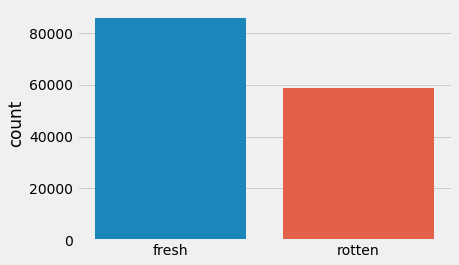

In [31]:
sns.countplot(df.freshness)
plt.xlabel('');

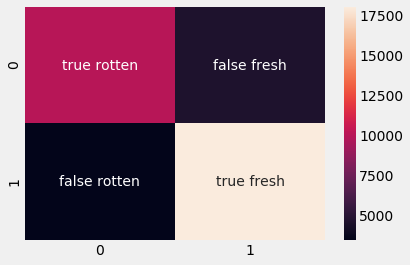

In [32]:
labels = np.array([['true rotten','false fresh'], ['false rotten','true fresh']])
sns.heatmap(confusion, annot=labels, fmt='');

This indicates the chosen model isn't terribly confused. False predictions for either class are much lower than true predictions, and the errors appear to be evenly split. There are about 7000 more true fresh predictions than true rotten predictions, but there are about 20,000 more fresh reviews in the dataset than rotten reviews.

### Predictive Words (Features)

In [33]:
words = np.array(vectorizer.get_feature_names())

# Save identity matrix where each row represents exactly one feature (word):
x = np.identity(len(words))

# Use the trained model to classify individual words as reviews and return the probability:
probability = clf.predict_log_proba(x)[:, 0]

# Sort (ascending) the matrix rows by probability and return the corresponding indices:
indices = np.argsort(probability)

# Filter the words list to find the ten most likely to indicate fresh or rotten:
fresh_words = words[indices[:10]]
rotten_words = words[indices[-10:]]

fresh_prob = probability[indices[:10]]
rotten_prob = probability[indices[-10:]]

# Display 10 most fresh and rotten words with the probability that the word is fresh:
print('Fresh words\t\tP(fresh|word)')
for word, p in zip(fresh_words, fresh_prob):
    print('{:>20}'.format(word), '\t{:0.2f}'.format(1 - np.exp(p)))

print()

print('Rotten words\t\tP(fresh|word)')
for word, p in zip(rotten_words, rotten_prob):
    print('{:>20}'.format(word), '\t{:0.2f}'.format(1 - np.exp(p)))

Fresh words		P(fresh|word)
            intimate 	0.91
       heartbreaking 	0.90
             quietly 	0.90
              deftly 	0.90
         beautifully 	0.89
          engrossing 	0.89
              richly 	0.89
          accessible 	0.89
           absorbing 	0.89
         devastating 	0.89

Rotten words		P(fresh|word)
             misfire 	0.16
               inert 	0.16
           squanders 	0.16
                dull 	0.15
                lame 	0.15
             joyless 	0.14
          uninspired 	0.14
               fails 	0.13
       unfortunately 	0.10
             unfunny 	0.07


### Incorrectly Classified Reviews

In [34]:
# Save probability for all observations:
probability = clf.predict_proba(vectorizer.transform(X))[:, 0]

# Filter by true class, sort and save the index for top and bottom values:
wrong_rotten = np.argsort(probability[y == 0])[:5]
wrong_fresh = np.argsort(probability[y == 1])[-5:]

print('Top 5 Incorrectly Classified Rotten Reviews')
print('-------------------------------------------')
for row in wrong_rotten:
    print(df[y == 0].review_quote.iloc[row], '({})'.format(df[y == 0].movie.iloc[row]))
    print()

print('Top 5 Incorrectly Classified Fresh Reviews')
print('------------------------------------------')
for row in wrong_fresh:
    print(df[y == 1].review_quote.iloc[row], '({})'.format(df[y == 1].movie.iloc[row]))
    print()

Top 5 Incorrectly Classified Rotten Reviews
-------------------------------------------
 Is this really an honest portrait of a beautiful and intense friendship between women? What's intense about it, or beautiful, or honest? (Miss You Already)

 Darkest Hour invites viewers inside the heart and mind of a great leader but never really captures his deep rapport with the British people, which turned out to be one of his greatest political assets. Dunkirk takes a more populist approach. (Darkest Hour)

 A tantalizing and beautiful picture made with tremendous integrity, and anchored by two marvelous performances, Isabel Coixet's The Secret Life of Words still, somehow, doesn't quite work. (The Secret Life of Words)

 What pleasure there is to be wrung from the exceptionally banal The Secret Life of Words lies in the harsh, unforgiving beauty (lyrically shot by Jean-Claude Larrieu) and wonderfully strange social life of the isolated rig. (The Secret Life of Words)

 The life at the movie's

The model obviously struggles with ambiguity.

### Predict Freshness of New Reviews

In [35]:
reviews = [
    ["This movie is not remarkable in any way."],
    ["The movie is remarkable in every way!"],
    ["Airplane! never gets old. My kid laughed throughout the entire thirty-something year old classic."],
    # From someone who gets migraines (with non-stop vomitting):
    ["The only hours I've ever wished to have back were the two I spent watching Inception."]
]
print()
for review in reviews:
    transformed = vectorizer.transform(review)
    print('"{}"'.format(review[0]))
    if clf.predict(transformed) == 1:
        print('Prediction: {:0.2f}% likely FRESH\n'.format(clf.predict_proba(transformed)[0][1]*100))
    else:
        print('Prediction: {:0.2f}% likely ROTTEN\n'.format(clf.predict_proba(transformed)[0][0]*100))


"This movie is not remarkable in any way."
Prediction: 77.43% likely FRESH

"The movie is remarkable in every way!"
Prediction: 85.12% likely FRESH

"Airplane! never gets old. My kid laughed throughout the entire thirty-something year old classic."
Prediction: 79.82% likely FRESH

"The only hours I've ever wished to have back were the two I spent watching Inception."
Prediction: 86.00% likely ROTTEN



This is another indication that the model may benefit from considering more than one word as a feature. 

---
## N-GRAMS

In [36]:
print('Minimum 1 word, Maximum 2 words')
print()
clf_count_1_2_ml, vectorizer_count_1_2_ml, confusion_count_1_2_ml = split_vect_clfy_maxlikelihood(X, y, parameters, ngram_range=(1, 2))
print('_'*65)
print()
clf_tfidf_1_2_ml, vectorizer_tfidf_1_2_ml, confusion_tfidf_1_2_ml = split_vect_clfy_maxlikelihood(X, y, parameters, tfidf=True, ngram_range=(1, 2))
print()

Minimum 1 word, Maximum 2 words

COUNT VECTORIZER
Best min_df: 0.0001
Best max_df: 0.25
Best alpha: 10
Best fit_prior: True

Accuracy on Training Data: 81.92%
    Accuracy on Test Data: 78.79%
_________________________________________________________________

TFIDF VECTORIZER
Best min_df: 1e-05
Best max_df: 0.25
Best alpha: 0.1
Best fit_prior: True

Accuracy on Training Data: 94.26%
    Accuracy on Test Data: 79.61%



In [37]:
clf = clf_count_1_2_ml
vectorizer = vectorizer_count_1_2_ml
confusion = confusion_count_1_2_ml

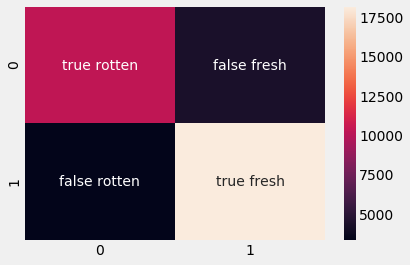

In [38]:
sns.heatmap(confusion, annot=labels, fmt='');

### Predictive Words/Phrases (Features)

In [39]:
words = np.array(vectorizer.get_feature_names())

# Save identity matrix where each row represents exactly one feature (word):
x = np.identity(len(words))

# Use the trained model to classify individual words as reviews and return the probability:
probability = clf.predict_log_proba(x)[:, 0]

# Sort (ascending) the matrix rows by probability and return the corresponding indices:
indices = np.argsort(probability)

# Filter the words list to find the ten most likely to indicate fresh or rotten:
fresh_words = words[indices[:10]]
rotten_words = words[indices[-10:]]

fresh_prob = probability[indices[:10]]
rotten_prob = probability[indices[-10:]]

# Display 10 most fresh and rotten words with the probability that the word is fresh:
print('Fresh  words/phrases\tP(fresh|word/phrase)')
for word, p in zip(fresh_words, fresh_prob):
    print('{:>20}'.format(word), '\t{:0.2f}'.format(1 - np.exp(p)))

print()

print('Rotten words/phrases\tP(fresh|word/phrase)')
for word, p in zip(rotten_words, rotten_prob):
    print('{:>20}'.format(word), '\t{:0.2f}'.format(1 - np.exp(p)))

Fresh  words/phrases	P(fresh|word/phrase)
        worth seeing 	0.91
            intimate 	0.91
           year best 	0.91
       heartbreaking 	0.90
             quietly 	0.90
              deftly 	0.90
          well worth 	0.90
         beautifully 	0.90
          engrossing 	0.89
              richly 	0.89

Rotten words/phrases	P(fresh|word/phrase)
                dull 	0.16
            flat and 	0.15
                lame 	0.15
             joyless 	0.15
          uninspired 	0.14
          problem is 	0.13
               fails 	0.13
            fails to 	0.13
       unfortunately 	0.11
             unfunny 	0.07


### Incorrectly Classified Reviews

In [40]:
# Save probability for all observations:
probability = clf.predict_proba(vectorizer.transform(X))[:, 0]

# Filter by true class, sort and save the index for top and bottom values:
wrong_rotten = np.argsort(probability[y == 0])[:5]
wrong_fresh = np.argsort(probability[y == 1])[-5:]

print('Top 5 Incorrectly Classified Rotten Reviews')
print('-------------------------------------------')
for row in wrong_rotten:
    print(df[y == 0].review_quote.iloc[row], '({})'.format(df[y == 0].movie.iloc[row]))
    print()

print('Top 5 Incorrectly Classified Fresh Reviews')
print('------------------------------------------')
for row in wrong_fresh:
    print(df[y == 1].review_quote.iloc[row], '({})'.format(df[y == 1].movie.iloc[row]))
    print()

Top 5 Incorrectly Classified Rotten Reviews
-------------------------------------------
 "The Light Between Oceans" is easily one of the year's most visually stunning films. Ironically, it's also one of the most difficult to watch. (The Light Between Oceans)

 If you missed Disney's last dip into Milne - the 2011 animated feature Winnie the Pooh - it's sweet and moving and beautiful and an all-ages delight. It's everything that Christopher Robin isn't. (Christopher Robin)

 Darkest Hour invites viewers inside the heart and mind of a great leader but never really captures his deep rapport with the British people, which turned out to be one of his greatest political assets. Dunkirk takes a more populist approach. (Darkest Hour)

 Is this really an honest portrait of a beautiful and intense friendship between women? What's intense about it, or beautiful, or honest? (Miss You Already)

 Meant as a passionate chronicle of a great love, and a sobering reminder of the stigma of AIDS, the pic 

### Predict Freshness of New Reviews

In [41]:
reviews = [
    ["This movie is not remarkable in any way."],
    ["The movie is remarkable in every way!"],
    ["Airplane! never gets old. My kid laughed throughout the entire thirty-something year old classic."],
    ["The only hours I've ever wished to have back were the two I spent watching Inception."]
]
print()
for review in reviews:
    transformed = vectorizer.transform(review)
    print('"{}"'.format(review[0]))
    if clf.predict(transformed) == 1:
        print('Prediction: {:0.2f}% likely FRESH\n'.format(clf.predict_proba(transformed)[0][1]*100))
    else:
        print('Prediction: {:0.2f}% likely ROTTEN\n'.format(clf.predict_proba(transformed)[0][0]*100))


"This movie is not remarkable in any way."
Prediction: 57.03% likely ROTTEN

"The movie is remarkable in every way!"
Prediction: 92.51% likely FRESH

"Airplane! never gets old. My kid laughed throughout the entire thirty-something year old classic."
Prediction: 69.56% likely FRESH

"The only hours I've ever wished to have back were the two I spent watching Inception."
Prediction: 96.68% likely ROTTEN



Most satisfying is that it also recognized how much I hated Inception. :)

---
## SUMMARY
Working with a corpus of 144,595 small documents (1-2 sentence reviews), Multinomial Naive Bayes classification was implemented on models for which:
* vectorization of the corpus involved basic counting, or
* the vectorized count was normalized;
* scikit-learn's default scoring metric (accuracy) was used for hyperparameter tuning, or
* the log-likelihood was maximized during hyperparameter tuning;
* features contained exactly one word, or
* features could include 1-2 words.

Normalization never helped and resulted in over-fit training data. Both scoring metrics returned similar results, but maximizing the log-likelihood involved the least amount of over-fitting. Considering features as 1-2 words improved performance, namely in the test exercise meant to confuse the model.

---
This started as an assignment using a much smaller dataset of 15,534 reviews. The same models were tested, but over-fitting was a lot more dramatic in every case, and the best model wasn't very precise. [Here is that notebook.](http://nbviewer.jupyter.org/github/humburgc/text_classification/blob/master/assigned_dataset.ipynb)